In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\cse\Desktop\AI_576\Indian Liver Patient Dataset (ILPD).csv")

In [3]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos              True
is_patient          False
dtype: bool

In [5]:
df.fillna(df.mean(),inplace=True)

In [6]:
df.isnull().any()

age                 False
gender              False
tot_bilirubin       False
direct_bilirubin    False
tot_proteins        False
albumin             False
ag_ratio            False
sgpt                False
sgot                False
alkphos             False
is_patient          False
dtype: bool

In [7]:
x=df.iloc[:,0:10].values
y=df.iloc[:,10:].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,1]=le.fit_transform(x[:,1])
y[:,0]=le.fit_transform(y[:,0])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
import sklearn.metrics as metrics

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_lr)
roc_auc_lr= metrics.auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
#Linear SVM
from sklearn.svm import SVC
lsvm = SVC(kernel = 'linear')
lsvm.fit(x_train, y_train)
y_pred_lsvm = lsvm.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_lsvm)
roc_auc_lsvm= metrics.auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#Gaussian SVM
from sklearn.svm import SVC
gsvm = SVC(kernel = 'rbf', random_state = 0)
gsvm.fit(x_train, y_train)
y_pred_gsvm = gsvm.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_gsvm)
roc_auc_gsvm = metrics.auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_knn)
roc_auc_knn= metrics.auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc_dt= metrics.auc(fpr, tpr)

In [17]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_rf)
roc_auc_rf=metrics.auc(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


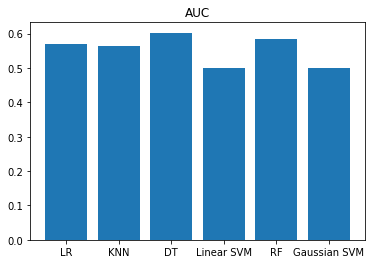

In [18]:
x=["LR","KNN","DT","Linear SVM","RF","Gaussian SVM"]
data=[roc_auc_lr,roc_auc_knn,roc_auc_dt,roc_auc_lsvm,roc_auc_rf,roc_auc_gsvm]
plt.title('AUC')
plt.bar(x, data)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(y_test, y_pred_lr)
ac_knn=accuracy_score(y_test, y_pred_knn)
ac_dt=accuracy_score(y_test, y_pred_dt)
ac_lsvm=accuracy_score(y_test, y_pred_lsvm)
ac_rf=accuracy_score(y_test, y_pred_rf)
ac_gsvm=accuracy_score(y_test, y_pred_gsvm)

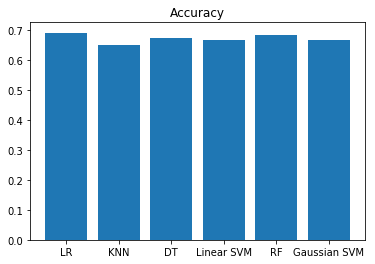

In [20]:
x=["LR","KNN","DT","Linear SVM","RF","Gaussian SVM"]
data=[ac_lr,ac_knn,ac_dt,ac_lsvm,ac_rf,ac_gsvm]
plt.title('Accuracy')
plt.bar(x, data)
plt.show()

In [24]:
roc_auc_lr

0.5705128205128205

In [23]:
roc_auc_knn

0.5641025641025641

In [25]:
roc_auc_dt

0.6025641025641025

In [26]:
roc_auc_lsvm

0.5

In [27]:
roc_auc_gsvm


0.5

In [28]:
roc_auc_rf

0.5833333333333333